In [1]:
import numpy as np
import pandas as pd



In [2]:
np.random.seed(42)

n = 100  # number of rows

df = pd.DataFrame({
    "customer_id": range(1, n+1),
    "income": np.random.randint(3000, 12000, size=n),            # monthly income
    "monthly_spend": np.random.randint(500, 7000, size=n),       # monthly spend
    "age": np.random.randint(18, 65, size=n),                    # age
    "credit_score": np.random.randint(300, 850, size=n),         # credit score
    "default_flag": np.random.choice([0, 1], size=n, p=[0.8, 0.2])  # target variable
})

In [3]:
df['spend_income_ratio'] = df['monthly_spend'] / df['income']


In [4]:
df['age_credit_ratio'] = df['age'] / df['credit_score']


Reasoning (Markdown):
This feature relates a customer’s age to their credit score.

A younger customer with a low score will have a high ratio (possibly riskier).

An older customer with a high score will have a low ratio (potentially safer).

In [5]:
df['disposable_income'] = df['income'] - df['monthly_spend']


This feature measures the leftover income after expenses.

Higher disposable income suggests financial security.

Lower disposable income (or negative) indicates risk of financial stress.

In [7]:
df.to_csv("synthetic_feature_engineering.csv", index=False)


In [8]:
df.head()


,customer_id,income,monthly_spend,age,credit_score,default_flag,spend_income_ratio,age_credit_ratio,disposable_income
0,1,10270,2070,49,582,0,0.201558,0.084192,8200
1,2,3860,5556,21,326,0,1.439378,0.064417,-1696
2,3,8390,6081,28,525,0,0.724791,0.053333,2309
3,4,8191,3190,34,576,0,0.389452,0.059028,5001
4,5,8734,4340,55,583,1,0.496909,0.094340,4394


In [10]:
import matplotlib.pyplot as plt

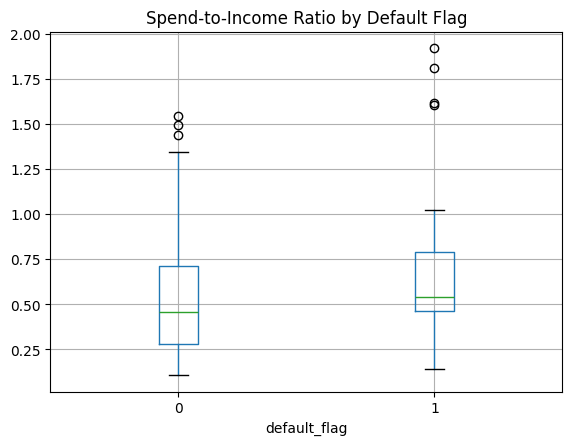

In [11]:
df[['spend_income_ratio','default_flag']].corr()
df.boxplot(column='spend_income_ratio', by='default_flag')
plt.title("Spend-to-Income Ratio by Default Flag")
plt.suptitle("")
plt.show()


This feature captures how much a customer spends relative to their earnings.

A high ratio means spending consumes a large share of income → higher financial stress.

A low ratio means spending is well within income limits → more stable financially.